In [306]:
## Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
%matplotlib inline
pd.options.display.max_columns = 999
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 5

import pickle

In [307]:
import os
os.listdir()

['.idea',
 '.ipynb_checkpoints',
 'bike-sharing-model.joblib',
 'bike-sharing-ridge_model.joblib',
 'bike-sharing_simple_model.joblib',
 'bike_counts.jpg',
 'bike_counts_holidays.jpg',
 'bike_counts_registered.jpg',
 'bike_counts_season.jpg',
 'bike_counts_seasons.jpg',
 'bike_counts_unregistered.jpg',
 'bike_counts_weather.jpg',
 'bike_counts_weathersit.jpg',
 'bike_counts_weekday.jpg',
 'bike_counts_workingday.jpg',
 'bike_counts_years.jpg',
 'Data Dictionararies.docx',
 'day.csv',
 'Evaluation Rubics.docx',
 'final bike sjharing presentation.odp',
 'Images',
 'Linear Regression Assignment.docx',
 'Linear+Regression+Subjective+Questions(1).pdf',
 'LR-Copy1.ipynb',
 'LR.ipynb',
 'project prosposal.odt',
 'README.md',
 'Sample Submission Notebook.ipynb',
 'test.eps']

In [308]:
## Loading up data 'day.csv'
raw_df = pd.read_csv('day.csv')

In [309]:
#Summarization of the data

In [310]:
raw_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [311]:
raw_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [312]:
raw_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [313]:
raw_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [314]:
type(raw_df)

pandas.core.frame.DataFrame

In [315]:
raw_df.shape

(730, 16)

In [316]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [317]:
raw_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [318]:
#unique values
raw_df.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

# Preprocessing the data

In [319]:
#check for null values
raw_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [320]:
#renaming the columns
raw_df = raw_df.rename(columns={'weathersit':'weather',
              'yr':'year',
              'mnth':'month',
              'hr':'hour',
              'hum':'humidity',
              'cnt' :'count'        
                       })
raw_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [321]:
raw_df = raw_df.drop(columns=['instant','dteday'])

In [322]:
# change int columns to category
cols = ['season','year','month','holiday','weekday','workingday','weather']

for col in cols:
    raw_df[col] = raw_df[col].astype('category')

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  count       730 non-null    int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 46.4 KB


# Exloratory Data Analysis

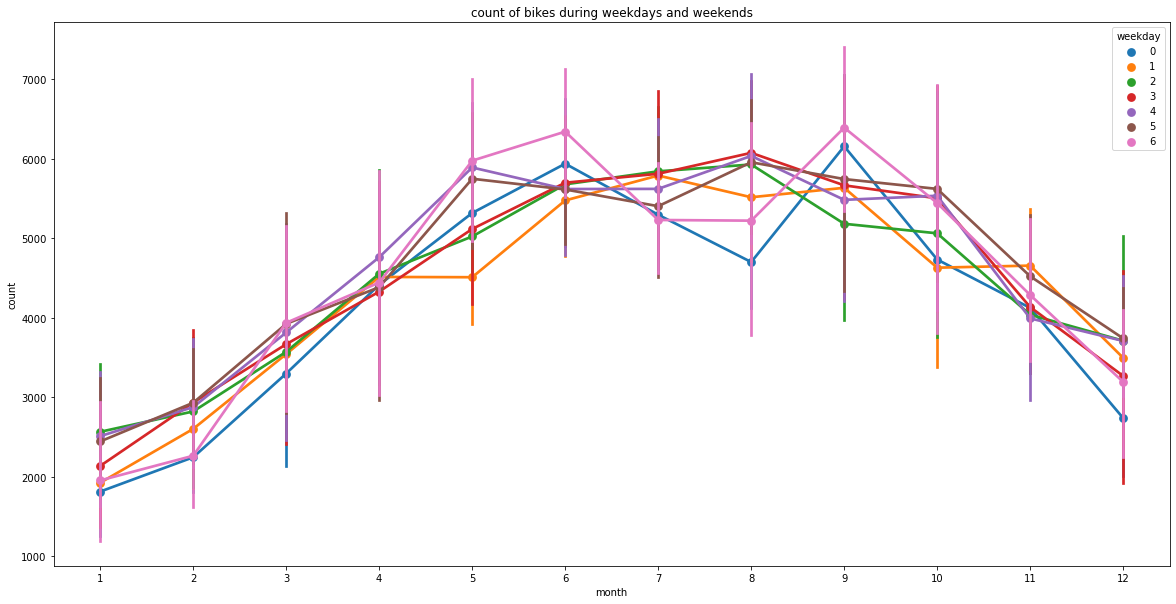

In [323]:
plt.figure(figsize=(20,10))
sns.pointplot(x='month', y='count', data=raw_df, hue='weekday')
plt.title('count of bikes during weekdays and weekends')
plt.savefig('bike_counts.jpg')

Inferences:
    * Bike count is maximum in the month 6 and 9
    * Bike count is maximum during weekends

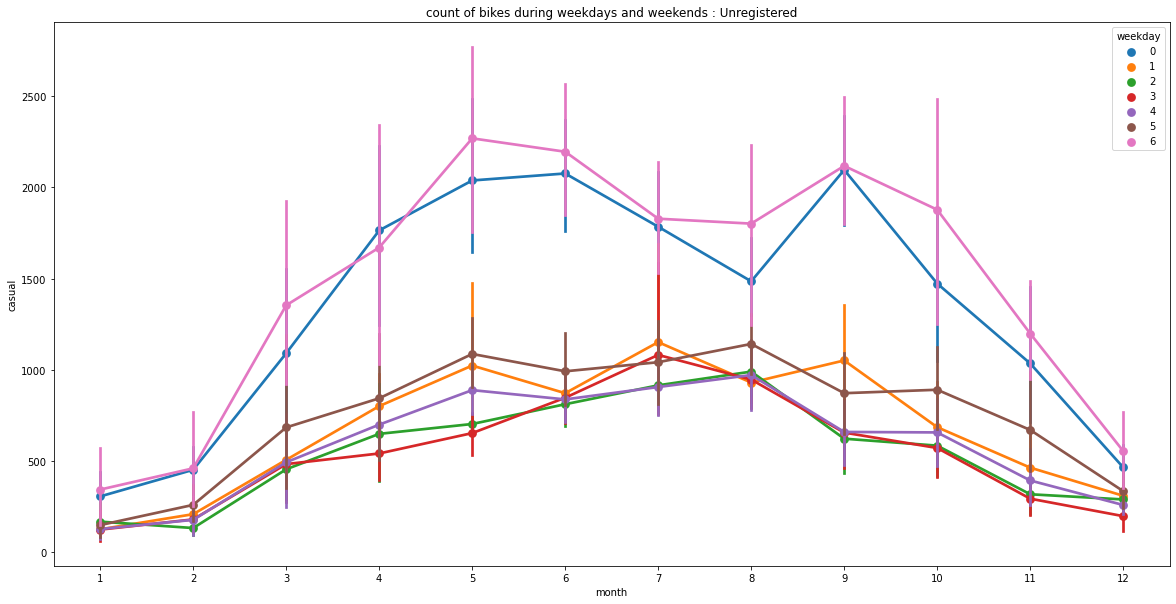

In [324]:
# count of bikes during weekdays and weekends
plt.figure(figsize=(20,10))
sns.pointplot(x='month', y='casual', data=raw_df, hue='weekday')
plt.title('count of bikes during weekdays and weekends : Unregistered')
plt.savefig('bike_counts_unregistered.jpg')

Inferences:
    * Bike count is maximum in the month 5
    * Bike count is maximum during weekends compared to weekdays

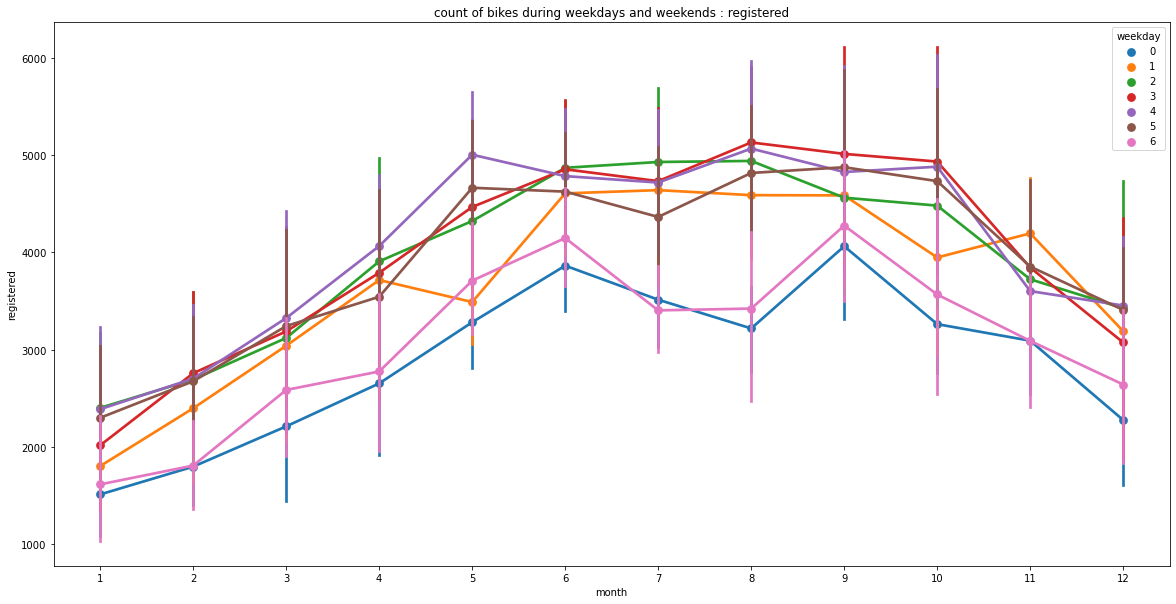

In [325]:
# count of bikes during weekdays and weekends
plt.figure(figsize=(20,10))
sns.pointplot(x='month', y='registered', data=raw_df, hue='weekday')
plt.title('count of bikes during weekdays and weekends : registered')
plt.savefig('bike_counts_registered.jpg')

Inference:
    * Bike count is maximum during weekdays

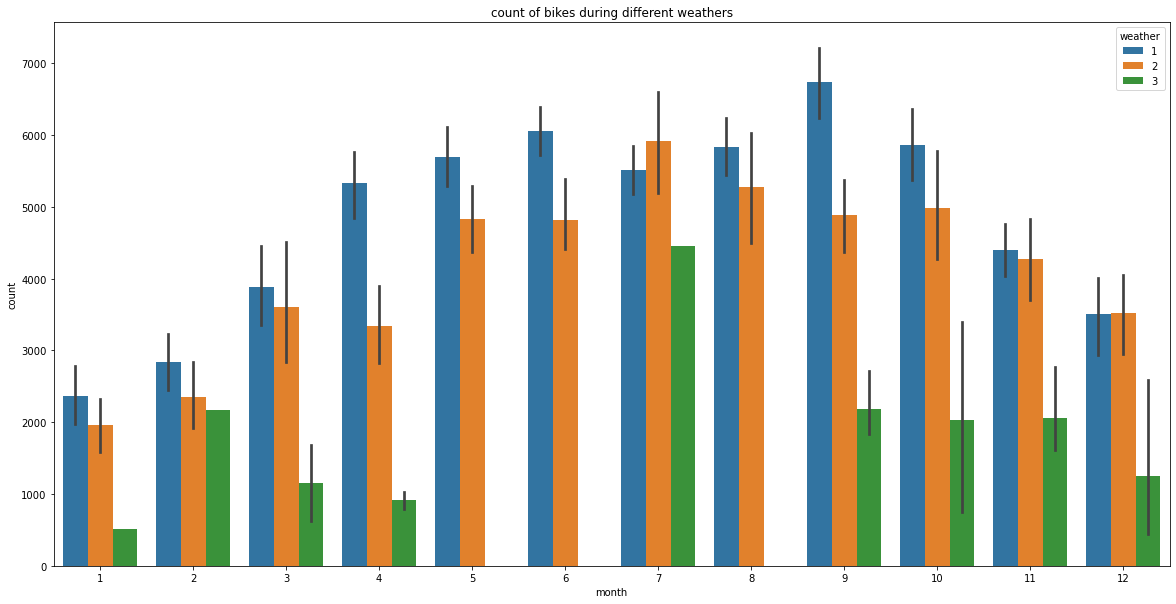

In [326]:
# count of bikes during weekdays and weekends
plt.figure(figsize=(20,10))
sns.barplot(x='month', y='count', data=raw_df, hue='weather')
plt.title('count of bikes during different weathers')
plt.savefig('bike_counts_weather.jpg')

Inferences:
    * Bike count is maximum when the weather is clear
    * Bike count is minimum when the weather is light Rain

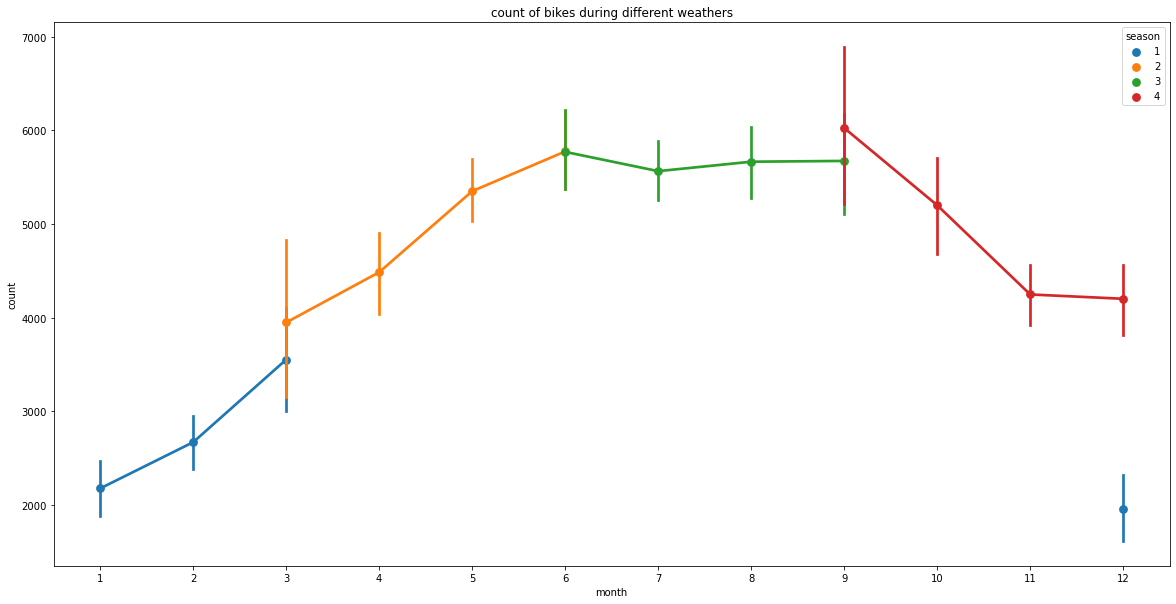

In [327]:
# count of bikes during weekdays and weekends
plt.figure(figsize=(20,10))
sns.pointplot(x='month', y='count', data=raw_df, hue='season')
plt.title('count of bikes during different weathers')
plt.savefig('bike_counts_season.jpg')

Inferences:
    * Bike count is maximum when the weather is clear
    * Bike count is minimum when the weather is light Rain

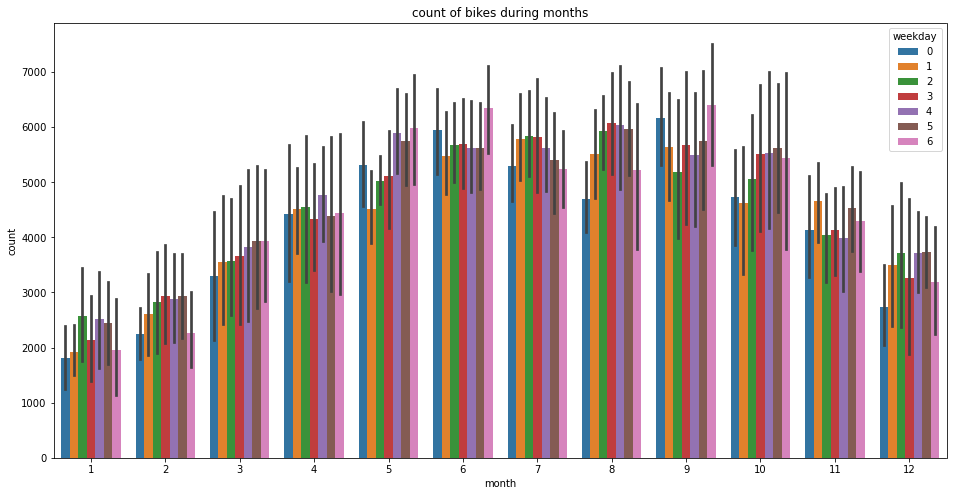

In [328]:
plt.figure(figsize=(16,8))
sns.barplot(x='month', y='count', data=raw_df, hue='weekday')
plt.title('count of bikes during months')
plt.savefig('bike_counts.jpg')

Inference:
    * Bike count is maximum during weekdays

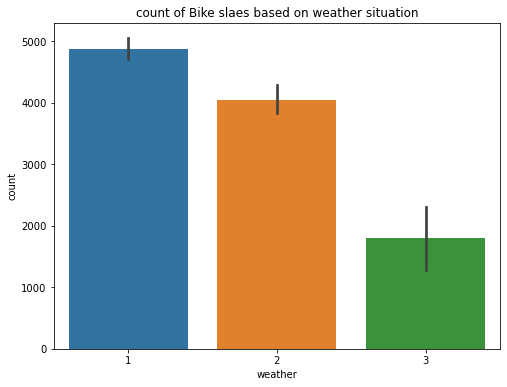

In [329]:
# Bike slaes based on weather situation
plt.figure(figsize=(8,6))
sns.barplot(x='weather', y='count', data=raw_df)
plt.title('count of Bike slaes based on weather situation')
plt.savefig('bike_counts_weathersit.jpg')

Inference:
    * Bike count is maximum at weather 1 

[Text(0.5, 1.0, 'Relation between humidity and users')]

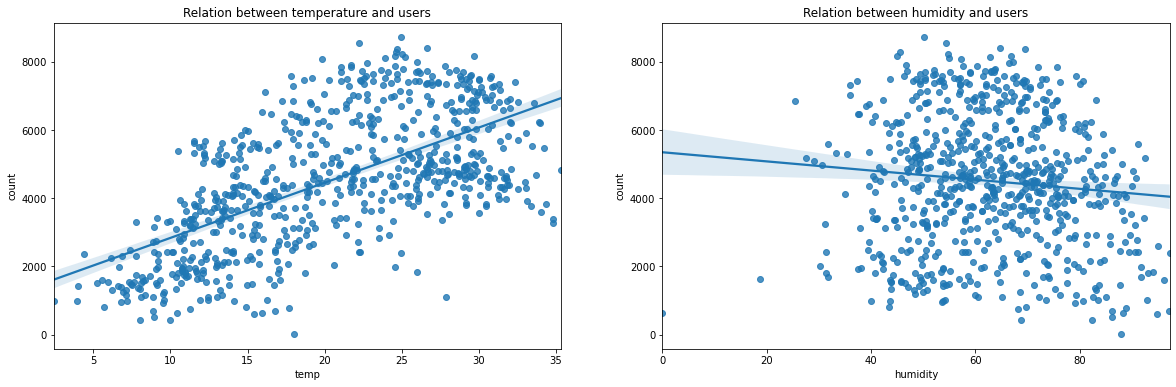

In [330]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=raw_df['temp'], y=raw_df['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=raw_df['humidity'], y=raw_df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

Inference:
    * As the temperature increases bike counts also increases
    * As the humidity increases nor of bikes decreases

[Text(0.5, 1.0, 'Theoretical quantiles')]

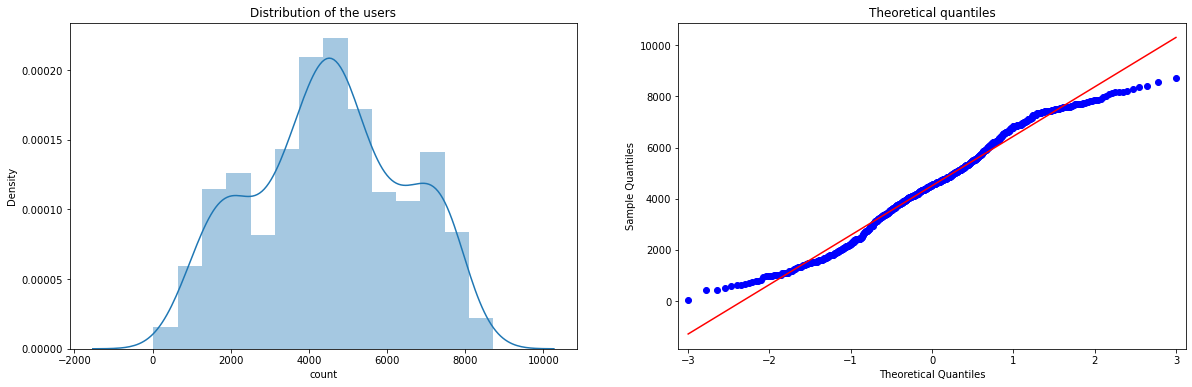

In [331]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(raw_df['count'], ax=ax1)
ax1.set(title="Distribution of the users")
qqplot(raw_df['count'], ax=ax2, line='s')
ax2.set(title="Theoretical quantiles")

Inference:
    * data is normally distributed

[Text(0.5, 1.0, 'Theoretical quantiles')]

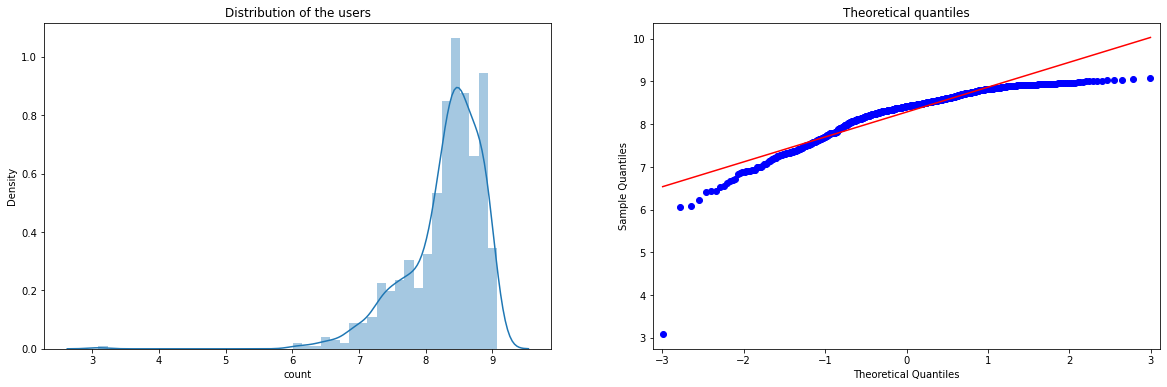

In [332]:
#log transformation
raw_df['count'] = np.log(raw_df['count'])
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(raw_df['count'], ax=ax1)
ax1.set(title="Distribution of the users")
qqplot(raw_df['count'], ax=ax2, line='s')
ax2.set(title="Theoretical quantiles")

Inference:
    * data is more normally distributed with the log values

# Correlation Matrix

<AxesSubplot:>

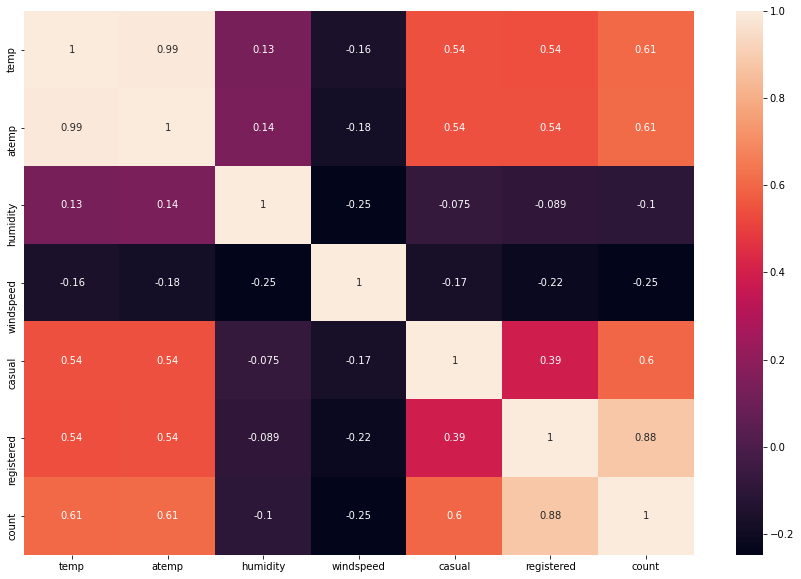

In [333]:
corr=raw_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

# One hot Encoding

In [334]:
pd.get_dummies(raw_df['season'], prefix='season')

,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
725,1,0,0,0
726,1,0,0,0
727,1,0,0,0
728,1,0,0,0


In [335]:
df = raw_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','holiday', 'weekday', 'workingday','weather']

for col in cols:
    df = one_hot_encoding(df, col)
    
df.head()


,year,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,0,14.110847,18.18125,80.5833,10.749882,331,654,6.892642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,14.902598,17.68695,69.6087,16.652113,131,670,6.685861,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,8.050924,9.47025,43.7273,16.636703,120,1229,7.207119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,8.200000,10.60610,59.0435,10.739832,108,1454,7.353722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,9.305237,11.46350,43.6957,12.522300,82,1518,7.377759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [336]:
x= raw_df.groupby(['season','year'])['count'].mean()
x

season  year
1       0       7.343790
        1       8.088595
2       0       8.176454
        1       8.705722
3       0       8.381751
        1       8.818449
4       0       8.155938
        1       8.571252
Name: count, dtype: float64

In which season was the demand price of sales was more/less?



In [337]:
#Descriptive Analysis
#Diagnostic ANalysis
#Predictive Analysis
#Prescriptive Analysis

# Input Split

In [338]:
X = df.drop(columns=['atemp', 'windspeed', 'casual','registered','count'],axis=1)
y=df['count']

# Declare feature variable and target variable

# Sales and Advertising data values are given by X and y respectively.

# Values attribute of pandas dataframe returns the numpy arrays.

# Model Training

In [390]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=42)

In [391]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((438, 27), (292, 27), (438,), (292,))

In [392]:
df.head()

,year,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,0,14.110847,18.18125,80.5833,10.749882,331,654,6.892642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,14.902598,17.68695,69.6087,16.652113,131,670,6.685861,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,8.050924,9.47025,43.7273,16.636703,120,1229,7.207119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,8.200000,10.60610,59.0435,10.739832,108,1454,7.353722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,9.305237,11.46350,43.6957,12.522300,82,1518,7.377759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [393]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

lm = LinearRegression()

In [394]:
lm = reg.fit(X_train,y_train)

In [395]:
y_train_pred = lm.predict(X_train)

In [396]:
y_test_pred = model.predict(X_test)

In [397]:
lm.predict(X)[0:5]

array([7.34478922, 7.34647886, 7.35881147, 7.29009432, 7.38714066])

In [398]:
# Calculate and print r2_score

from sklearn.metrics import r2_score

print("Train model performance : ")
print ("R2 Score value: {:.4f}".format(r2_score(y_train, y_train_pred)))

print("\n"*2)

print("Test model performance : ")
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_test_pred)))

Train model performance : 
R2 Score value: 0.8133



Test model performance : 
R2 Score value: 0.6776


In [399]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error

print("Train model performance : ")
rmse = np.sqrt(mse)
mse = mean_squared_error(y_train, y_train_pred)
print("RMSE value of train data: {:.4f}".format(rmse))


print("\n"*2)

print("Test model performance : ")
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print("RMSE value of test data: {:.4f}".format(rmse))

Train model performance : 
RMSE value of train data: 0.3577



Test model performance : 
RMSE value of test data: 0.3446


In [400]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.8133
Test set score: 0.6525


In [401]:
import joblib
joblib.dump(lm,"images/bike-sharing_simple_model.joblib")

['images/bike-sharing_simple_model.joblib']

# Applying Ridge Regression

In [351]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from numpy import std
from numpy import absolute
from numpy import mean

In [352]:
# define model
model = Ridge(alpha=1.0)

In [353]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [354]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [355]:
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.185 (0.026)


In [379]:
# fit model
model.fit(X, y)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [380]:
# make a prediction
yhat = model.predict(X)

In [381]:
# summarize prediction
yhat[0:5]

array([7.37746412, 7.35906994, 7.32895203, 7.33229681, 7.43566355])

In [382]:
# Calculate and print r2_score

from sklearn.metrics import r2_score

print("Train model performance : ")
print ("R2 Score value: {:.4f}".format(r2_score(y, yhat)))


Train model performance : 
R2 Score value: 0.7509


In [383]:
import joblib
joblib.dump(model,"images/Ridge_model.joblib")

['images/Ridge_model.joblib']

# Tuning Ridge Hyper parameters

In [385]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [386]:
# define model
model1 = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model1, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.185
Config: {'alpha': 0.6}


In [387]:
# use automatically configured the ridge regression algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model1 = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model1.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model1.alpha_)

alpha: 0.600000


In [388]:
# Calculate and print r2_score

from sklearn.metrics import r2_score

print("Train model performance : ")
print ("R2 Score value: {:.4f}".format(r2_score(y, yhat)))


Train model performance : 
R2 Score value: 0.7509


In [389]:
import joblib
joblib.dump(model1,"images/Ridge_tuned_model.joblib")

['images/Ridge_tuned_model.joblib']

# Lasso Regression

In [440]:
from sklearn.linear_model import Lasso

# Create an instance of Lasso Regression implementation
#
lasso = Lasso(alpha=1.0)
#
# Fit the Lasso model
#
lasso.fit(X_train, y_train)
#
# Create the model score
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.3483299235884564, 0.2848820258746362)

In [441]:
import joblib
joblib.dump(lasso,"images/lasso_model.joblib")

['images/lasso_model.joblib']

# Lasso Regression Crossvalidation

In [442]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
#
# Fit the Lasso model
#
lasso_cv.fit(X_train, y_train)
#
# Create the model score
#
lasso_cv.score(X_train, y_train), lasso_cv.score(X_test, y_test)

(0.8002437123413954, 0.657528296799556)

In [443]:
import joblib
joblib.dump(lasso_cv,"images/lasso_cv_model.joblib")

['images/lasso_cv_model.joblib']